Import all the Libraries necessary for the Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Plotting
import seaborn as sns  #Plotting
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from zipfile import ZipFile
from PIL import Image, ImageFilter, ImageEnhance
from skimage.io import imread
from skimage.transform import resize
import datetime
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet201, VGG16, NASNetLarge, Xception, InceptionResNetV2  #PreTrained Models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, LeakyReLU, UpSampling2D, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Lambda
from skimage.segmentation import mark_boundaries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
import shap
import lime
from lime import lime_image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\Alvin Jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Nutritional Data

The Data which was imported using the Spoonacular API in the CSV file is being used here. 

In [45]:
df= pd.read_csv('First25_nutrition.csv')

In [46]:
df.head()

,Food Category,Ingredients,Instructions,Calories,Fat,Saturated Fat,Carbohydrates,Net Carbohydrates,Sugar,Cholesterol,...,Vitamin B6,Copper,Folate,Fiber,Iron,Vitamin E,Vitamin B3,Vitamin K,Caffeine,Vitamin C
0,apple pie,"baking powder, baking soda, butter, canola oil...","<ol><li>In a large bowl, combine oats, flour, ...",362.43,16.11,7.39,44.61,43.34,35.38,73.24,...,0.20,0.11,20.46,1.26,0.89,0.55,0.70,2.03,NaN,NaN
1,baby back ribs,"chile powder, thyme, ground cumin, garlic powd...",Preheat the oven to *350. Mix the first seven ...,695.23,34.42,11.26,58.31,54.22,49.64,130.41,...,1.21,0.56,23.89,4.09,6.31,3.37,15.78,17.20,10.47,13.08
2,baklava,"walnuts, sugar, ground cinnamon, phyllo, butte...","In large bowl of food processor, add walnuts, ...",395.15,30.13,8.53,29.23,27.90,16.30,32.81,...,0.16,0.31,19.09,1.34,0.70,0.43,0.99,1.20,NaN,NaN
3,beet salad,"beet, basil, leave lettuce, maple syrup, olive...",<ol><li>Chop the peppers and lettuce into thin...,209.51,5.56,0.78,39.48,30.56,29.91,0.00,...,0.82,0.15,235.33,8.91,2.31,4.98,2.86,49.34,NaN,312.38
4,beignets,"butter, eggs, flour, nutmeg, oil, salt, sugar,...",<ol><li>In a large heavy skillet or deep-fat f...,144.37,11.22,5.31,10.29,10.24,8.85,47.62,...,NaN,NaN,7.18,NaN,0.22,0.79,NaN,2.69,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food Category      22 non-null     object 
 1   Ingredients        22 non-null     object 
 2   Instructions       22 non-null     object 
 3   Calories           22 non-null     float64
 4   Fat                22 non-null     float64
 5   Saturated Fat      22 non-null     float64
 6   Carbohydrates      22 non-null     float64
 7   Net Carbohydrates  22 non-null     float64
 8   Sugar              22 non-null     float64
 9   Cholesterol        22 non-null     float64
 10  Sodium             22 non-null     float64
 11  Alcohol            22 non-null     float64
 12  Alcohol %          22 non-null     float64
 13  Protein            22 non-null     float64
 14  Calcium            20 non-null     float64
 15  Phosphorus         20 non-null     float64
 16  Vitamin B2         21 non-nu

In [48]:
df_final = df[['Food Category','Ingredients','Instructions','Calories','Fat','Saturated Fat','Carbohydrates','Net Carbohydrates','Sugar','Cholesterol','Protein','Fiber']]

In [49]:
df_final.head()

,Food Category,Ingredients,Instructions,Calories,Fat,Saturated Fat,Carbohydrates,Net Carbohydrates,Sugar,Cholesterol,Protein,Fiber
0,apple pie,"baking powder, baking soda, butter, canola oil...","<ol><li>In a large bowl, combine oats, flour, ...",362.43,16.11,7.39,44.61,43.34,35.38,73.24,11.48,1.26
1,baby back ribs,"chile powder, thyme, ground cumin, garlic powd...",Preheat the oven to *350. Mix the first seven ...,695.23,34.42,11.26,58.31,54.22,49.64,130.41,41.40,4.09
2,baklava,"walnuts, sugar, ground cinnamon, phyllo, butte...","In large bowl of food processor, add walnuts, ...",395.15,30.13,8.53,29.23,27.90,16.30,32.81,8.01,1.34
3,beet salad,"beet, basil, leave lettuce, maple syrup, olive...",<ol><li>Chop the peppers and lettuce into thin...,209.51,5.56,0.78,39.48,30.56,29.91,0.00,5.07,8.91
4,beignets,"butter, eggs, flour, nutmeg, oil, salt, sugar,...",<ol><li>In a large heavy skillet or deep-fat f...,144.37,11.22,5.31,10.29,10.24,8.85,47.62,1.20,NaN


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food Category      22 non-null     object 
 1   Ingredients        22 non-null     object 
 2   Instructions       22 non-null     object 
 3   Calories           22 non-null     float64
 4   Fat                22 non-null     float64
 5   Saturated Fat      22 non-null     float64
 6   Carbohydrates      22 non-null     float64
 7   Net Carbohydrates  22 non-null     float64
 8   Sugar              22 non-null     float64
 9   Cholesterol        22 non-null     float64
 10  Protein            22 non-null     float64
 11  Fiber              19 non-null     float64
dtypes: float64(9), object(3)
memory usage: 2.2+ KB


In [51]:
df_final['Updated Instructions']= df_final['Instructions'].apply(lambda x: BeautifulSoup(x, "lxml").text) #Removal of HTML Tags

C:\Users\Alvin Jacob\AppData\Local\Temp\ipykernel_17396\1949225862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Updated Instructions']= df_final['Instructions'].apply(lambda x: BeautifulSoup(x, "lxml").text) #Removal of HTML Tags


In [52]:
df_final['Instructions'].head()

0    <ol><li>In a large bowl, combine oats, flour, ...
1    Preheat the oven to *350. Mix the first seven ...
2    In large bowl of food processor, add walnuts, ...
3    <ol><li>Chop the peppers and lettuce into thin...
4    <ol><li>In a large heavy skillet or deep-fat f...
Name: Instructions, dtype: object

In [53]:
df_final['Updated Instructions'].head()

0    In a large bowl, combine oats, flour, sugar, b...
1    Preheat the oven to *350. Mix the first seven ...
2    In large bowl of food processor, add walnuts, ...
3    Chop the peppers and lettuce into thin slivers...
4    In a large heavy skillet or deep-fat fryer, he...
Name: Updated Instructions, dtype: object

In [54]:
import re
df_final['Updated Instructions']= df_final['Updated Instructions'].apply(lambda x: re.compile(r'https?://\S+|www\.\S+').sub(r'', x)) #Removal of URL

C:\Users\Alvin Jacob\AppData\Local\Temp\ipykernel_17396\1057639379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Updated Instructions']= df_final['Updated Instructions'].apply(lambda x: re.compile(r'https?://\S+|www\.\S+').sub(r'', x)) #Removal of URL


In [55]:
df_final['Updated Instructions'].head()

0    In a large bowl, combine oats, flour, sugar, b...
1    Preheat the oven to *350. Mix the first seven ...
2    In large bowl of food processor, add walnuts, ...
3    Chop the peppers and lettuce into thin slivers...
4    In a large heavy skillet or deep-fat fryer, he...
Name: Updated Instructions, dtype: object

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Alvin
[nltk_data]     Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
#Summarizing the Recipe Text
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
def sumy_method(text):
  parser = PlaintextParser.from_string(text, Tokenizer("english"))
  summarizer = LexRankSummarizer()
  summary = summarizer(parser.document, 6)
  dp = []
  for i in summary:
     lp = str(i)
  dp.append(lp)
  final_sentence = ' '.join(dp)
  return final_sentence

df_final.loc[:, 'summary_instructions'] = df_final['Updated Instructions'].apply(sumy_method)

In [62]:
df_final['summary_instructions'].head()

0    Store in refrigerator.Note: If you find that t...
1    But in a pinch, buy a bottled variety you like...
2    To serve, finish cutting, with a sharp knife, ...
3                        Garnish with sunflower seeds.
4    Drain on paper towels and sprinkle immediately...
Name: summary_instructions, dtype: object

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Food Category         22 non-null     object 
 1   Ingredients           22 non-null     object 
 2   Instructions          22 non-null     object 
 3   Calories              22 non-null     float64
 4   Fat                   22 non-null     float64
 5   Saturated Fat         22 non-null     float64
 6   Carbohydrates         22 non-null     float64
 7   Net Carbohydrates     22 non-null     float64
 8   Sugar                 22 non-null     float64
 9   Cholesterol           22 non-null     float64
 10  Protein               22 non-null     float64
 11  Fiber                 19 non-null     float64
 12  Updated Instructions  22 non-null     object 
 13  summary_instructions  22 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.5+ KB


In [67]:
df_final_updated = df_final[['Food Category','Ingredients','Calories','Fat','Saturated Fat','Carbohydrates','Net Carbohydrates','Sugar','Cholesterol','Protein','Fiber','Updated Instructions','summary_instructions']]

Loading Dataset and Data Augmentation

In [17]:
#Loading the Dataset. The augmentation is applied to the training dataset. 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_dir='Food - 25' #Path to the Dataset containing the images

#Image Size of (300,300) defined in the coding below by using the Parameter target_size.
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300), 
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 20000 images belonging to 25 classes.
Found 5000 images belonging to 25 classes.


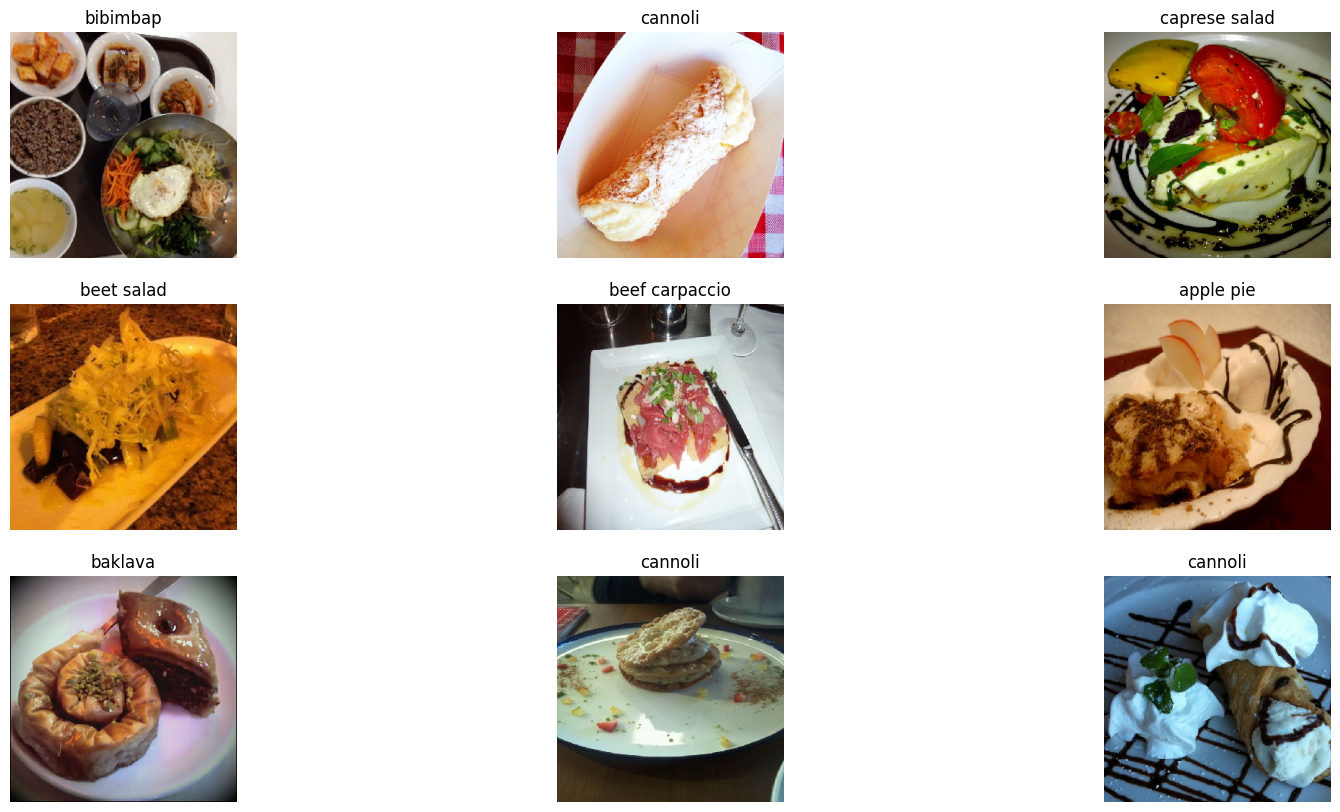

In [18]:
#Showing the Images without the augmenation
class_names = list(validation_generator.class_indices.keys())
images, labels = next(validation_generator)
plt.figure(figsize=(20, 10))
for i in range(9): 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")
plt.show()

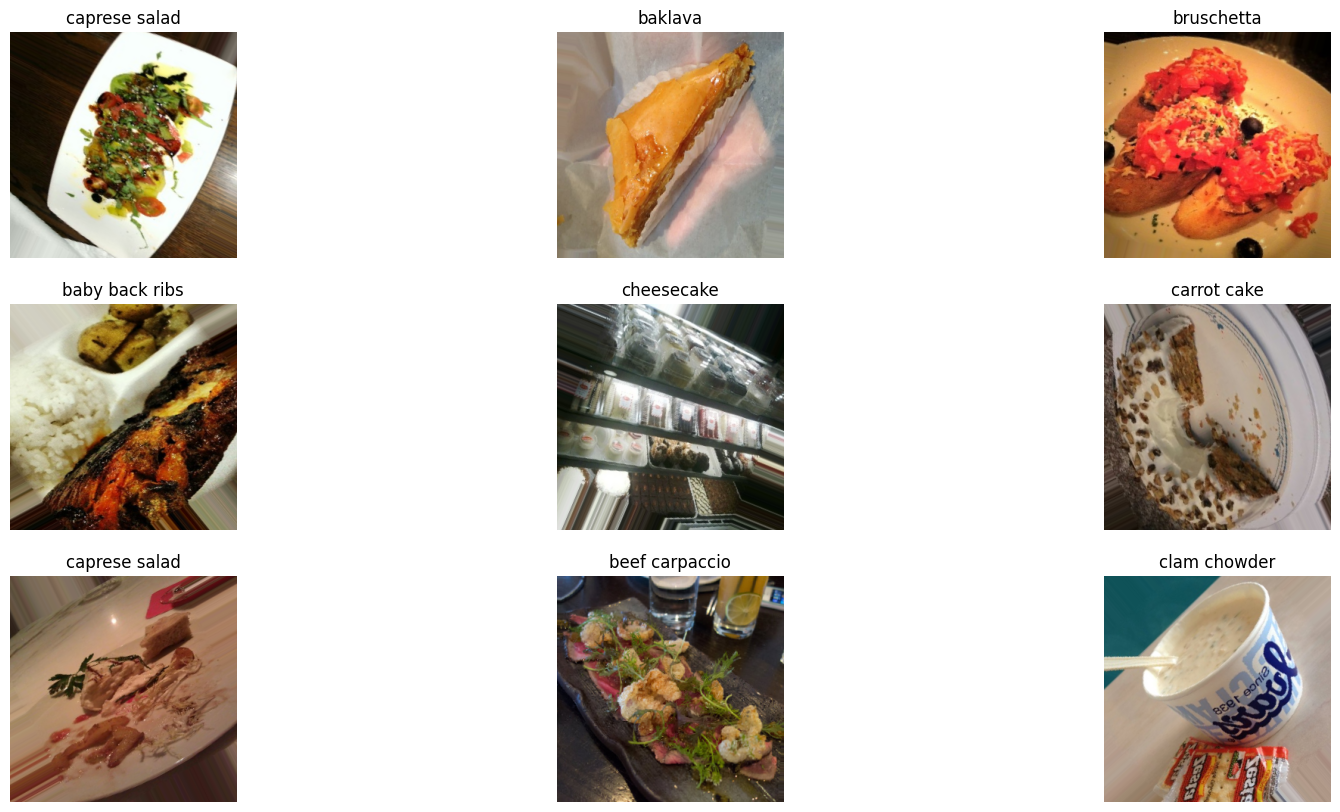

In [19]:
#Showing the Images with the augmentation
images, labels = next(train_generator)
plt.figure(figsize=(20, 10))
for i in range(9): 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")
plt.show()

Deep Learning

Transfer Learning

In [20]:
#Pre Trained Model
model_define = InceptionResNetV2(
    input_shape=(300, 300, 3),
    include_top=False,
    weights="imagenet"
)

In [21]:
#Freezing the Layers
for each in model_define.layers:
    each.trainable=False

In [22]:
#Model with various layers defined
model = Sequential([
    model_define,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation="relu"),
    LeakyReLU(alpha=0.1),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_203 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                        

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [25]:
tabulated_values_first_set=model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


625/625 [==============================] - 3731s 6s/step - loss: 2.1134 - accuracy: 0.3841 - val_loss: 1.3900 - val_accuracy: 0.5724
Epoch 2/10
625/625 [==============================] - 3140s 5s/step - loss: 1.6373 - accuracy: 0.5238 - val_loss: 1.4030 - val_accuracy: 0.5904
Epoch 3/10
625/625 [==============================] - 1538s 2s/step - loss: 1.5024 - accuracy: 0.5702 - val_loss: 1.4349 - val_accuracy: 0.5788
Epoch 4/10
625/625 [==============================] - 1519s 2s/step - loss: 1.4253 - accuracy: 0.5962 - val_loss: 1.5814 - val_accuracy: 0.5394
Epoch 5/10
625/625 [==============================] - 1523s 2s/step - loss: 1.3796 - accuracy: 0.6065 - val_loss: 1.2664 - val_accuracy: 0.6232
Epoch 6/10
625/625 [==============================] - 1518s 2s/step - loss: 1.3180 - accuracy: 0.6302 - val_loss: 1.3230 - val_accuracy: 0.6094
Epoch 7/10
625/625 [==============================] - 1517s 2s/step - loss: 1.2786 - accuracy: 0.6364 - val_loss: 1.1163 - val_accurac

Visualizing the Graphs for the Transfer Learning

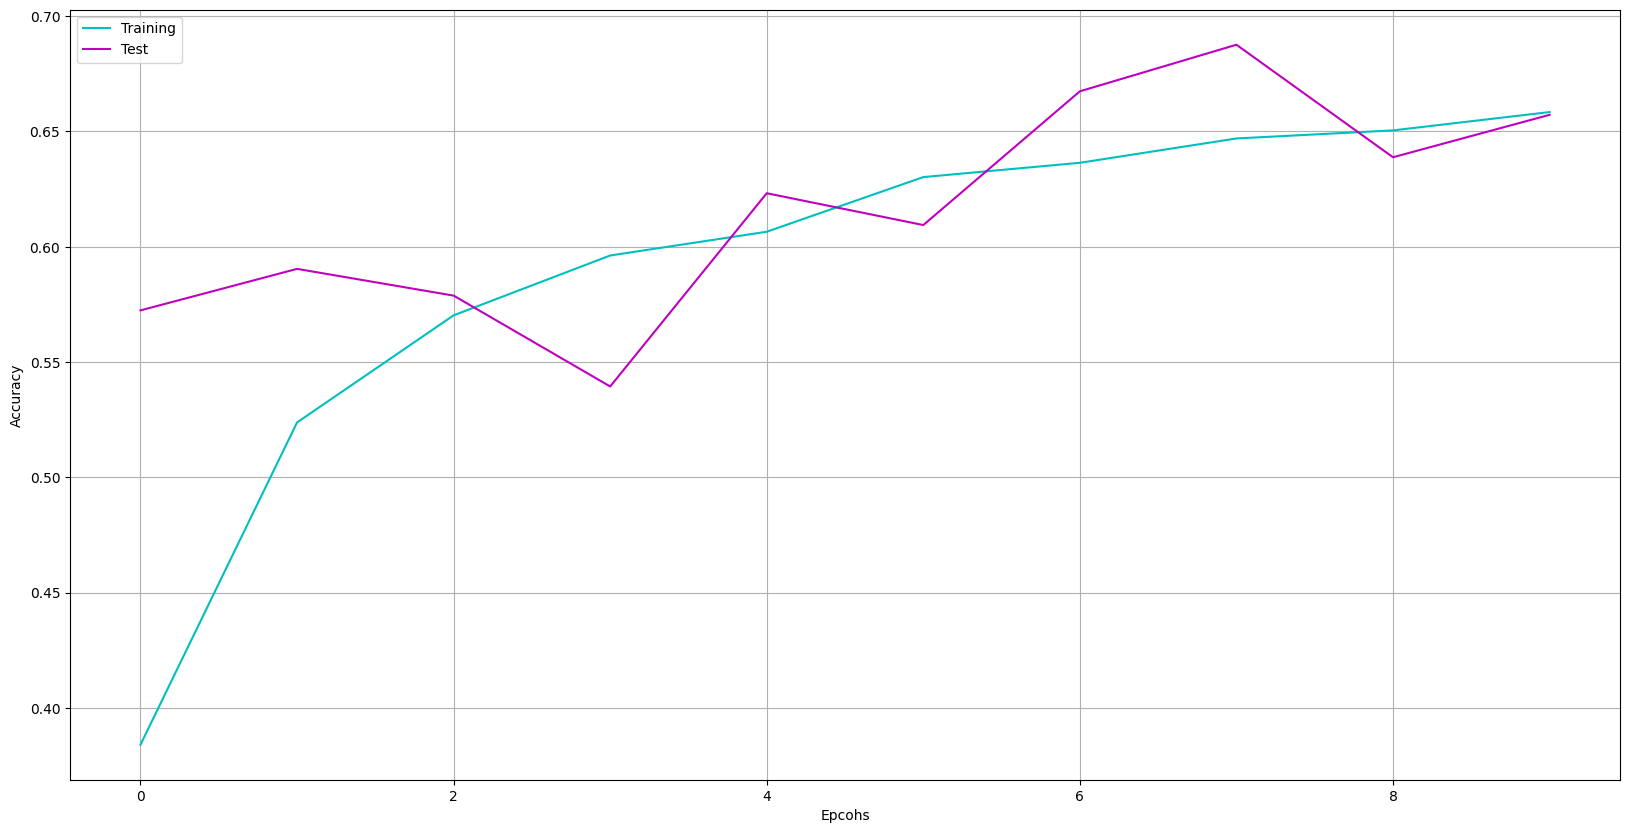

In [26]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(tabulated_values_first_set.history['accuracy'],color='c')
plt.plot(tabulated_values_first_set.history['val_accuracy'],color='m')
plt.legend(['Training','Test'],loc='upper left')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

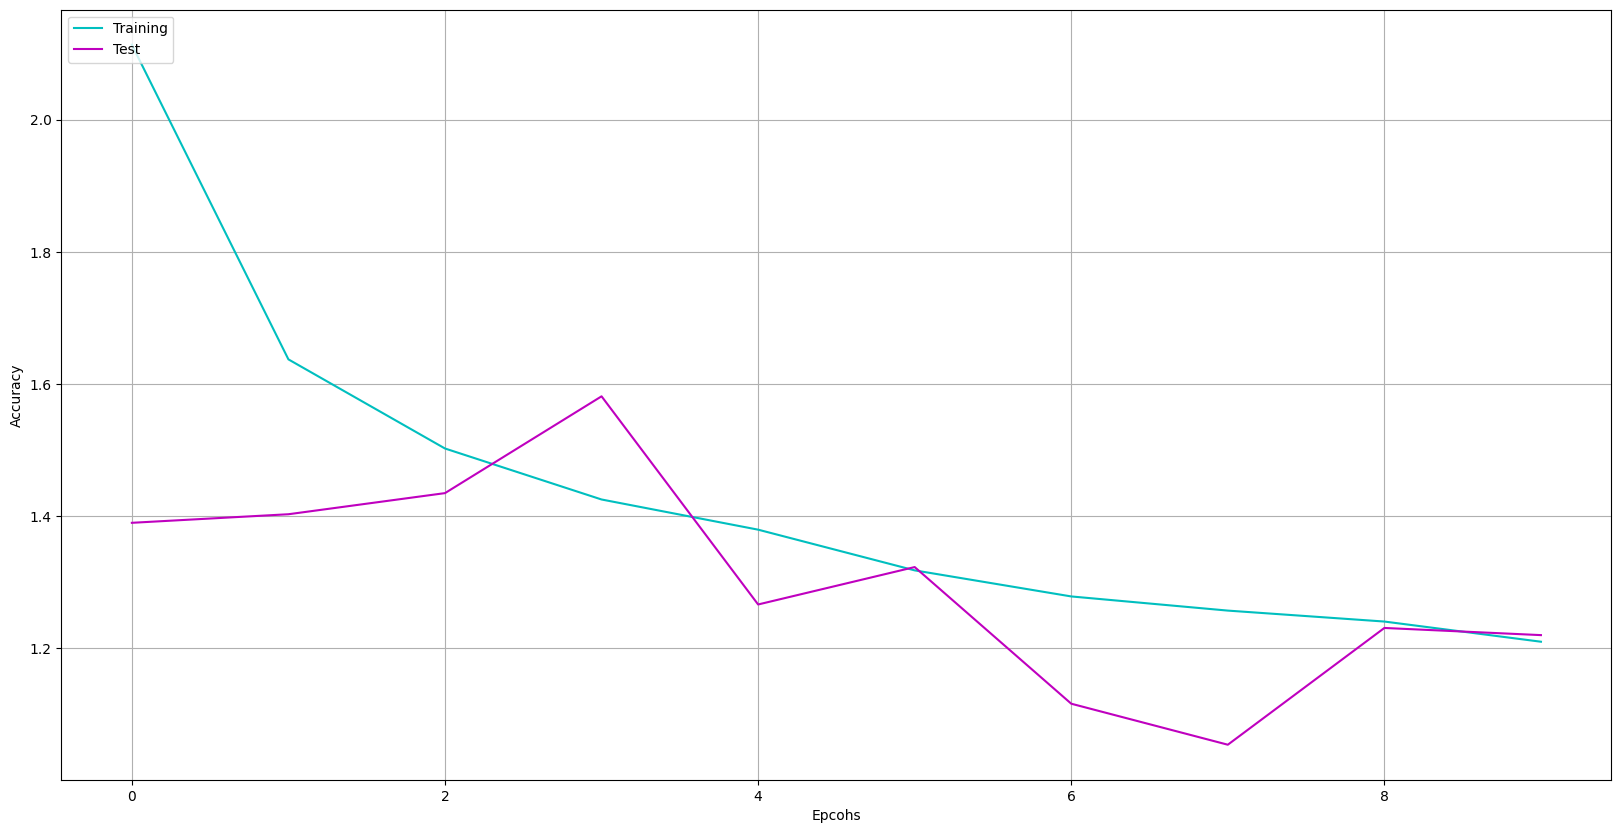

In [27]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(tabulated_values_first_set.history['loss'],color='c')
plt.plot(tabulated_values_first_set.history['val_loss'],color='m')
plt.legend(['Training','Test'],loc='upper left')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Fine Tuning 

In [28]:
#Unfreezing the Layers
for each in model_define.layers:
    each.trainable=True

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_203 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                        

In [30]:
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy' , metrics=['accuracy'])

In [31]:
tabulated_values_second_set=model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
625/625 [==============================] - 4321s 7s/step - loss: 1.0983 - accuracy: 0.7017 - val_loss: 0.7428 - val_accuracy: 0.7884
Epoch 2/15
625/625 [==============================] - 4300s 7s/step - loss: 0.7694 - accuracy: 0.7867 - val_loss: 0.7172 - val_accuracy: 0.8022
Epoch 3/15
625/625 [==============================] - 4357s 7s/step - loss: 0.6541 - accuracy: 0.8214 - val_loss: 0.7266 - val_accuracy: 0.8008
Epoch 4/15
625/625 [==============================] - 4409s 7s/step - loss: 0.5787 - accuracy: 0.8426 - val_loss: 0.6838 - val_accuracy: 0.8146
Epoch 5/15
625/625 [==============================] - 6910s 11s/step - loss: 0.5152 - accuracy: 0.8607 - val_loss: 0.7147 - val_accuracy: 0.8096
Epoch 6/15
625/625 [==============================] - 5113s 8s/step - loss: 0.4563 - accuracy: 0.8752 - val_loss: 0.6670 - val_accuracy: 0.8228
Epoch 7/15
625/625 [==============================] - 4412s 7s/step - loss: 0.4287 - accuracy: 0.8862 - val_loss: 0.7045 - val_accuracy

Visualizing the Graphs for the Fine Tuning

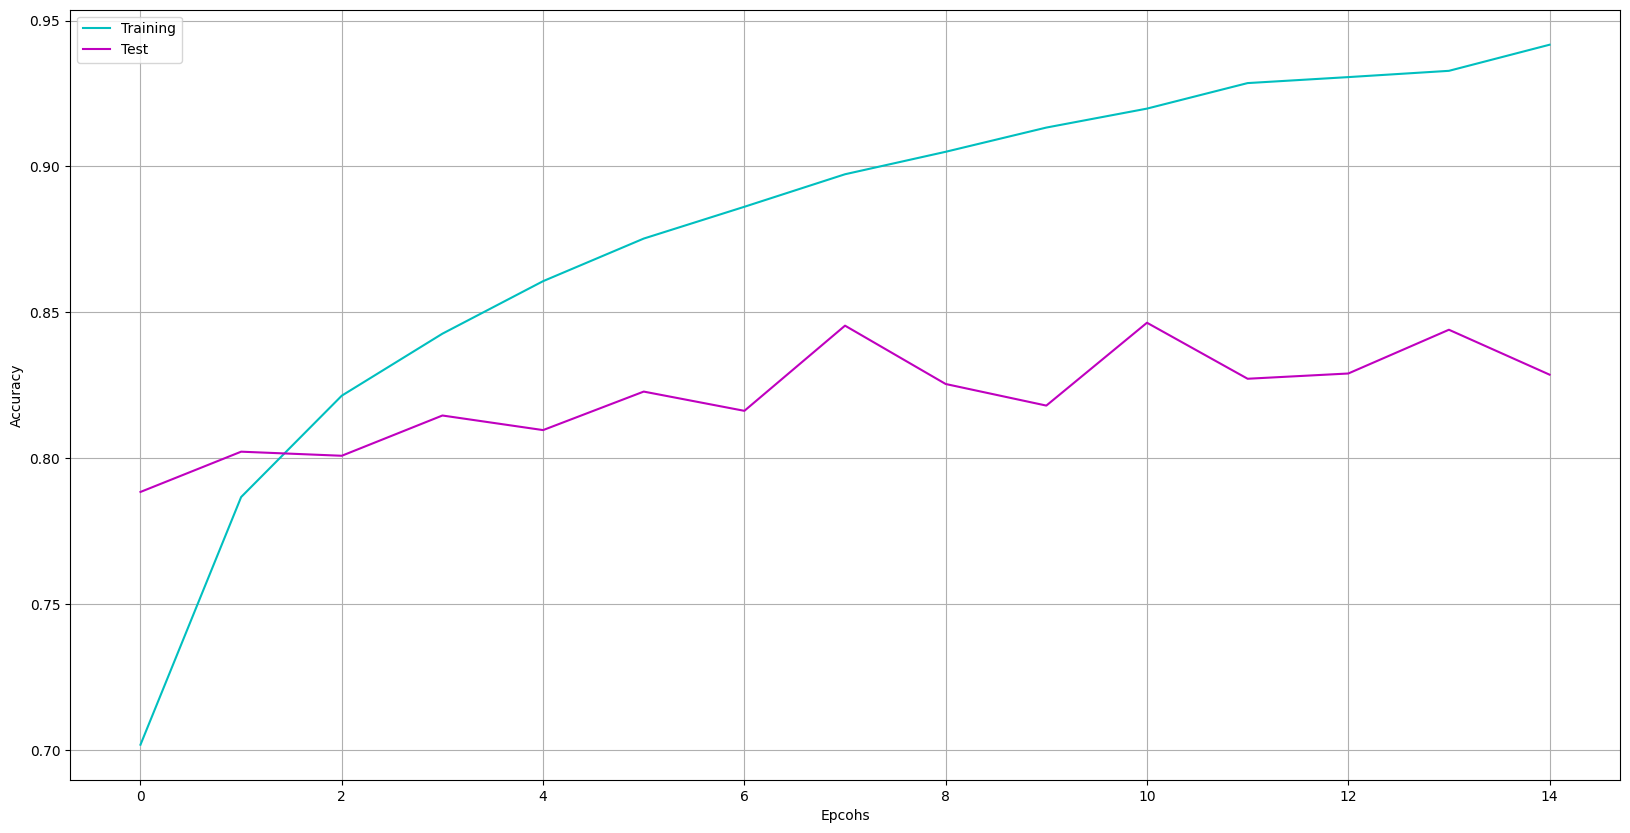

In [32]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(tabulated_values_second_set.history['accuracy'],color='c')
plt.plot(tabulated_values_second_set.history['val_accuracy'],color='m')
plt.legend(['Training','Test'],loc='upper left')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

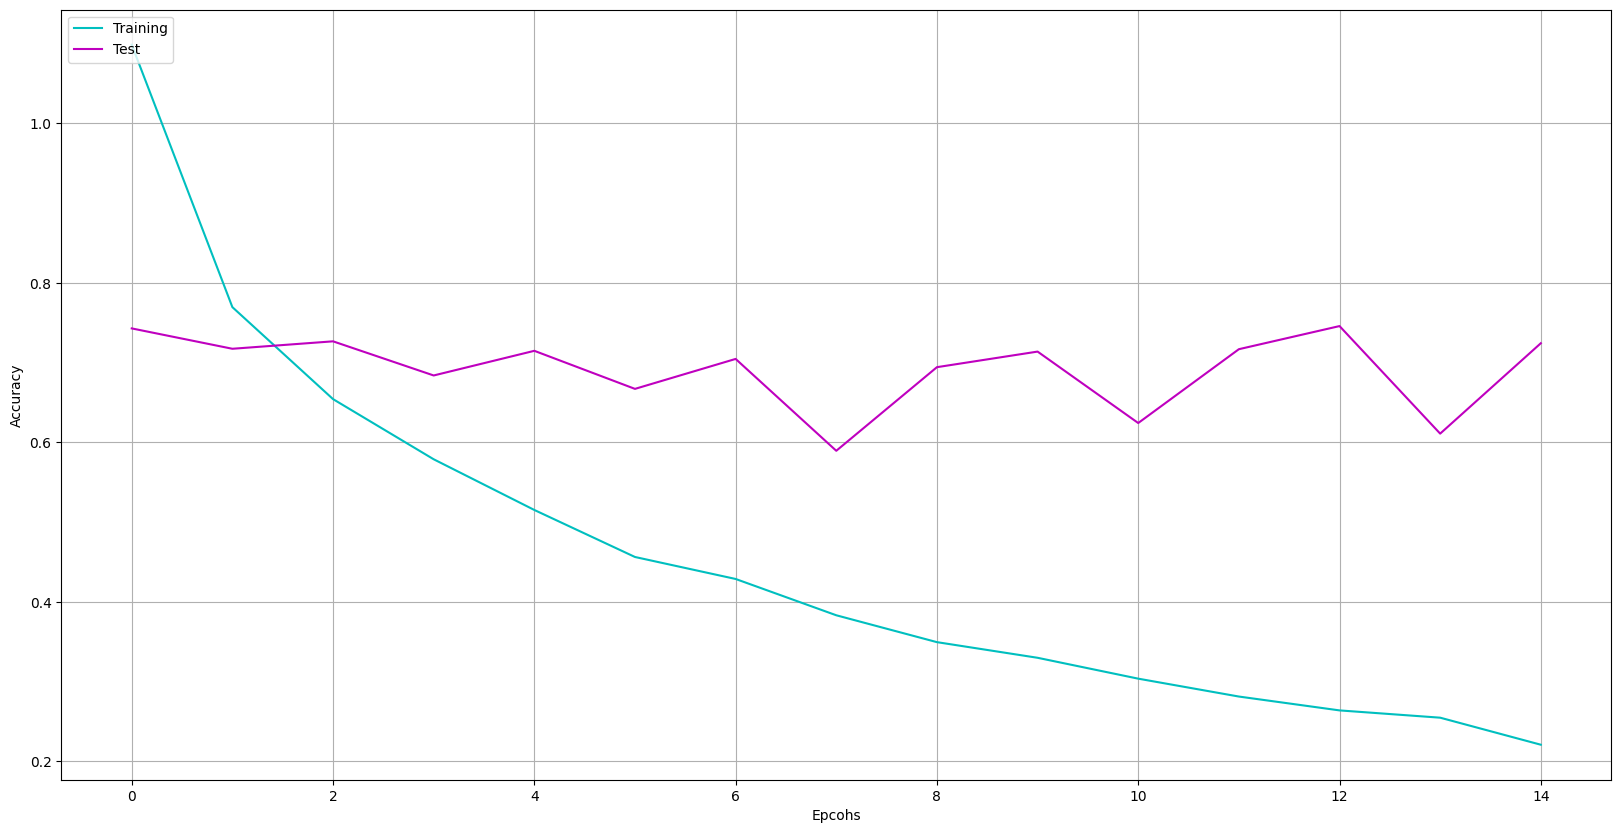

In [33]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(tabulated_values_second_set.history['loss'],color='c')
plt.plot(tabulated_values_second_set.history['val_loss'],color='m')
plt.legend(['Training','Test'],loc='upper left')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Confusion Matrix

157/157 [==============================] - 302s 2s/step


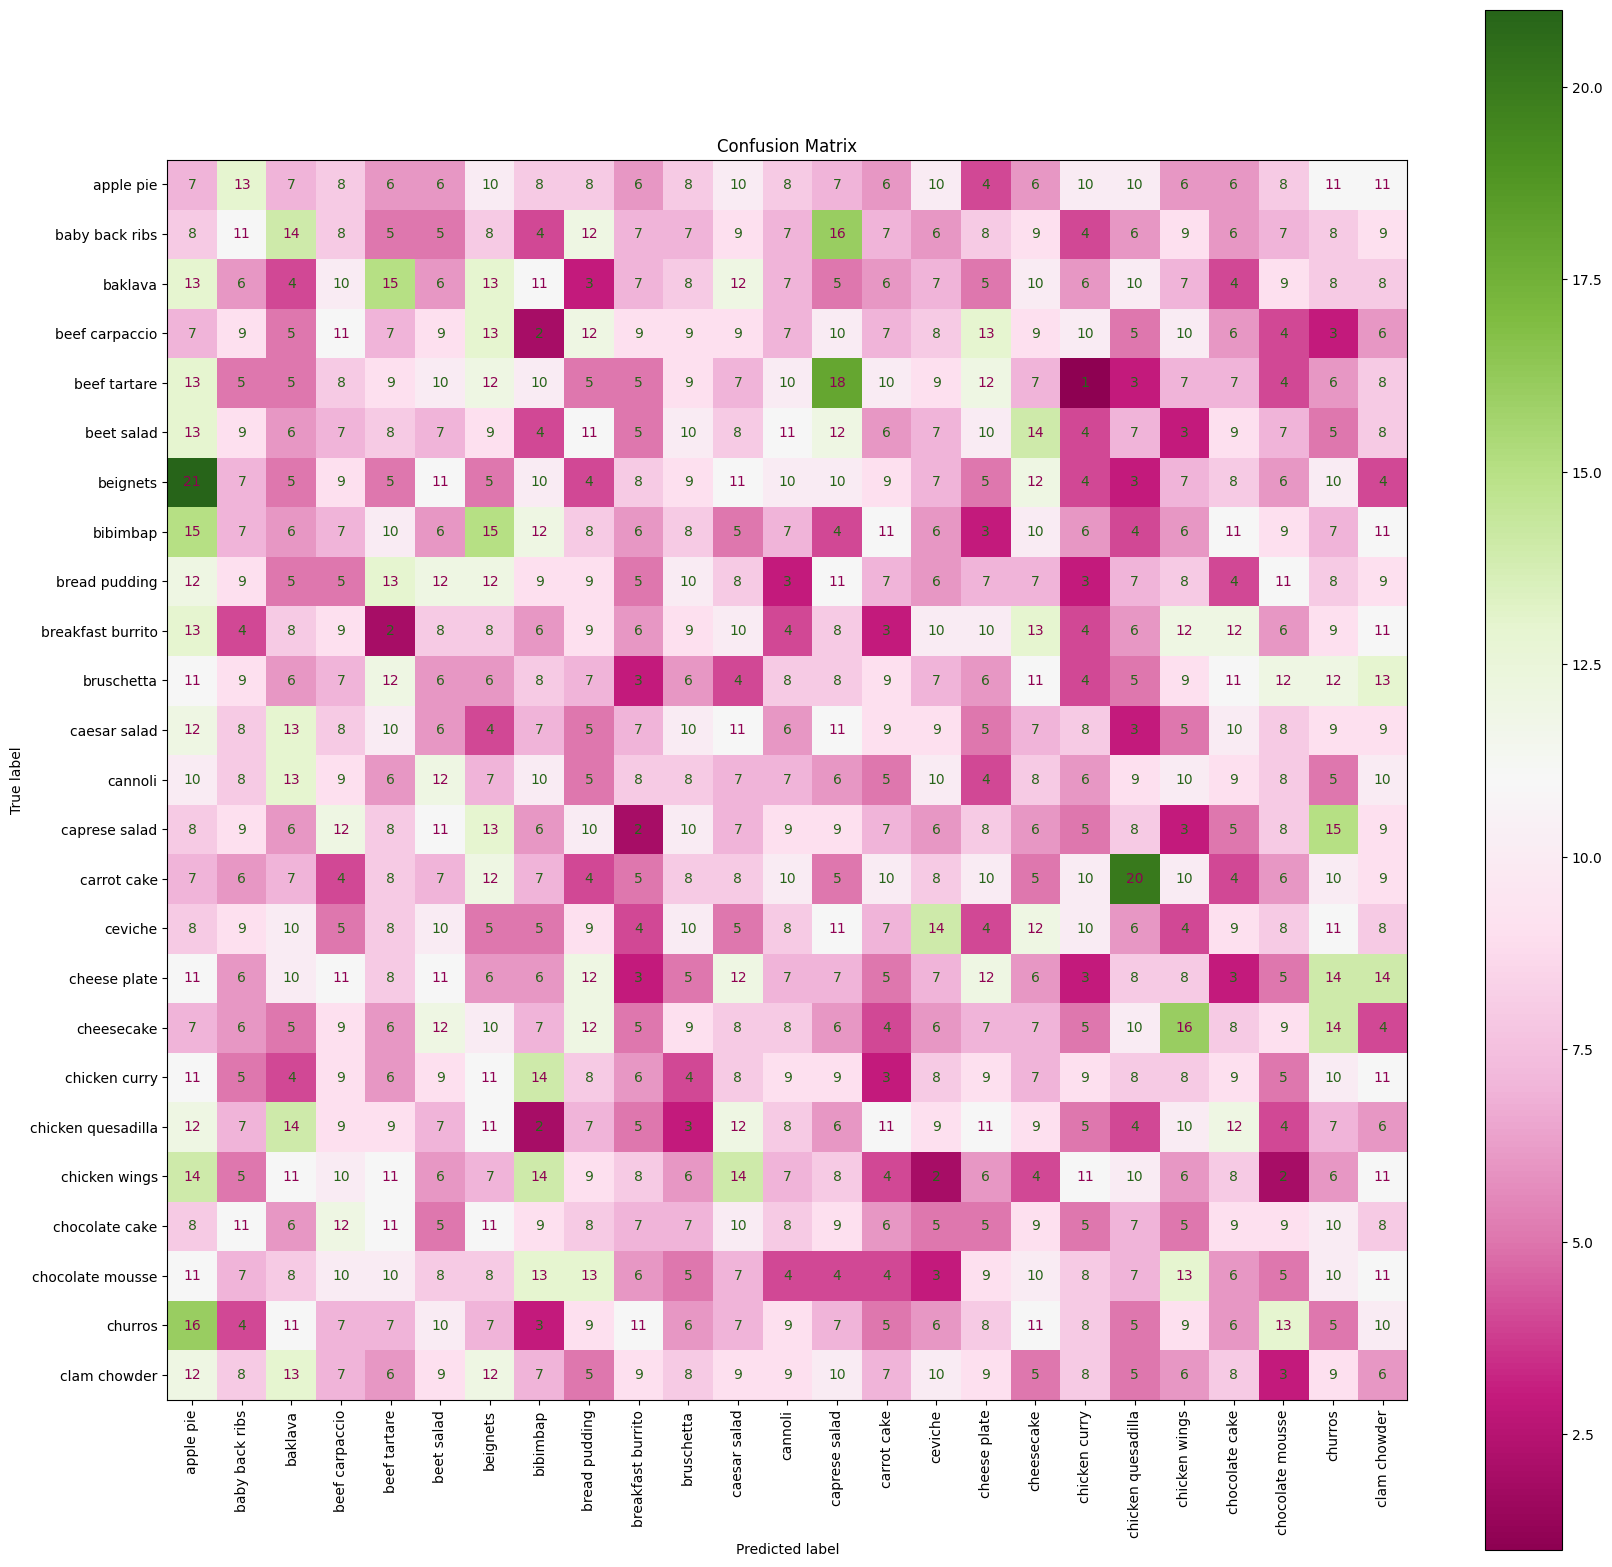

In [34]:
actuallabels = validation_generator.classes  
predicting = model.predict(validation_generator)
prediction_labels = np.argmax(predicting, axis=1) 
cmatrix = confusion_matrix(actuallabels, prediction_labels)
fig, ax = plt.subplots(figsize=(20, 20))  
plotting = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=validation_generator.class_indices.keys())
plotting.plot(cmap="PiYG", ax=ax, xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [35]:
accuracyfor_oneclass = cmatrix.diagonal() / cmatrix.sum(axis=1)

Accuracy for Each Class respresented using the histogram

C:\Users\Alvin Jacob\AppData\Local\Temp\ipykernel_17396\3339081354.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(validation_generator.class_indices.keys()), y=accuracyfor_oneclass, palette="coolwarm")


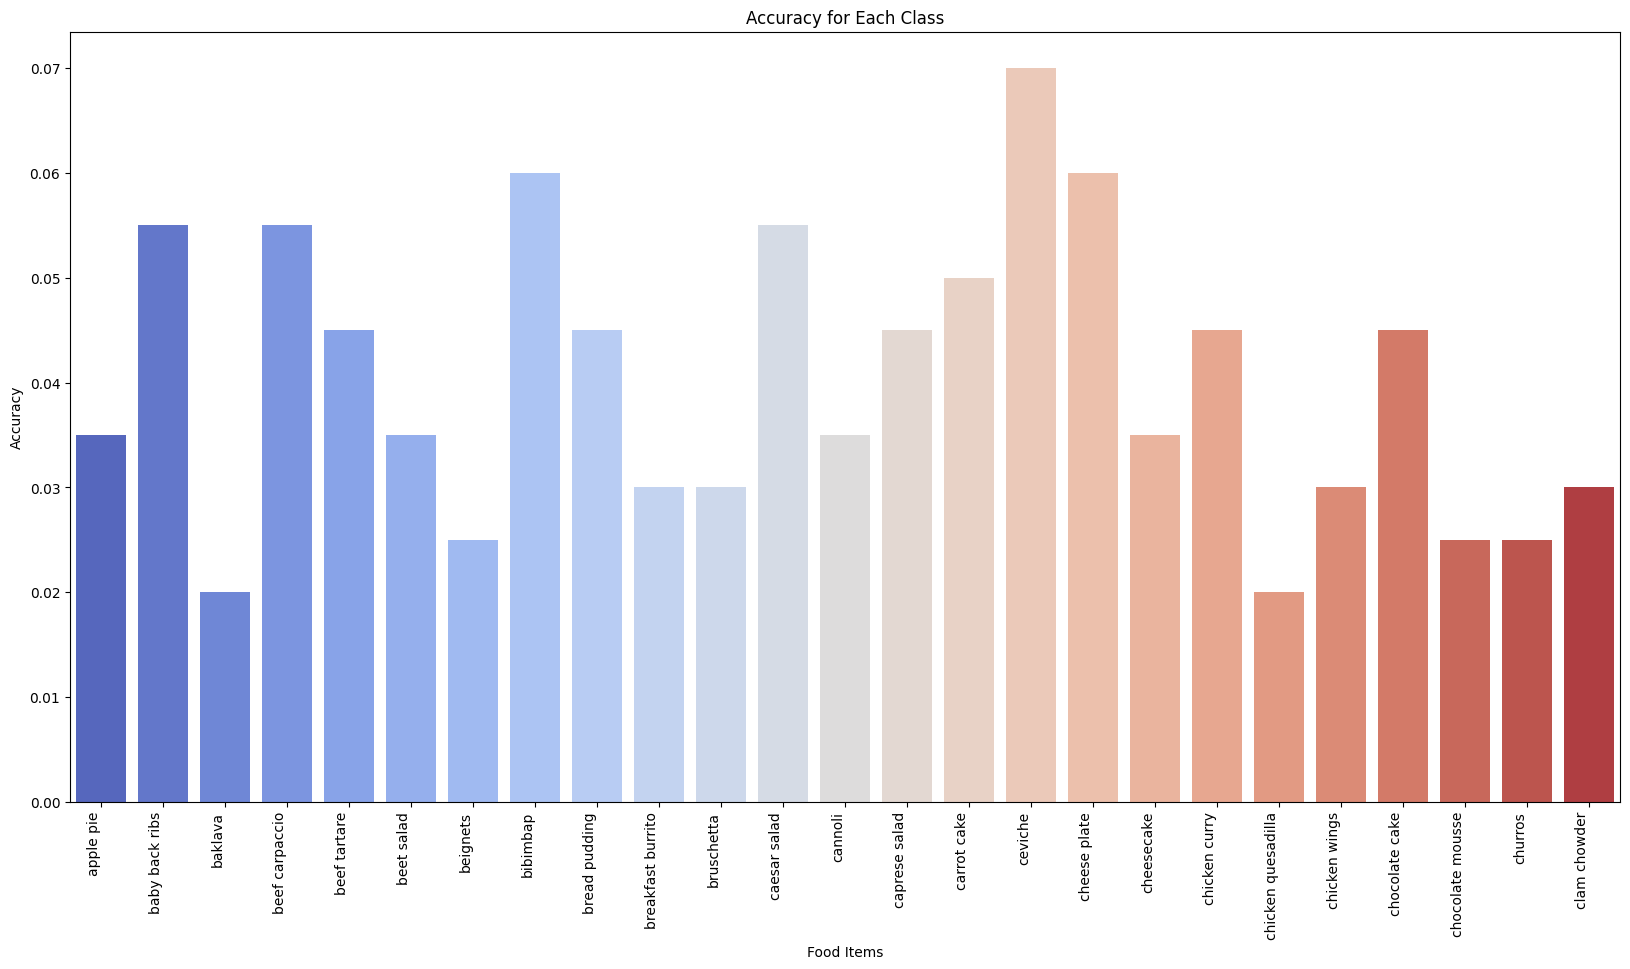

In [36]:
sns.barplot(x=list(validation_generator.class_indices.keys()), y=accuracyfor_oneclass, palette="coolwarm")
plt.title('Accuracy for Each Class')
plt.xlabel('Food Items')
plt.ylabel('Accuracy')
plt.xticks(rotation=90, ha="right")
plt.show()

Using LIME for the Explainability

In [37]:
def data_preprocessing(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0
    return img_arr

image_path = '134.jpg'
img_array = data_preprocessing(image_path)

In [38]:
def probability_images(images):
    return model.predict(images)

In [39]:
prediction = model.predict(img_array)
print(" Prediction Probabilities ", prediction)

1/1 [==============================] - 2s 2s/step
 Prediction Probabilities  [[9.97317731e-01 1.69370807e-07 1.21019453e-04 2.17261586e-08
  1.75712145e-07 5.37868861e-09 3.47657129e-04 1.53622601e-11
  1.26890163e-03 2.74684794e-07 2.20653819e-05 1.84868432e-09
  9.01970225e-07 2.19271499e-08 4.61874442e-05 1.86608233e-07
  1.55826947e-05 1.00979756e-04 1.02240310e-05 1.41368480e-06
  2.97274755e-06 2.60039224e-06 1.39013071e-06 2.90805474e-06
  7.36586342e-04]]


In [40]:
explaination = lime_image.LimeImageExplainer()
explanation_generation = explaination.explain_instance(
    img_array[0],                      
    probability_images,                       
    top_labels=5,                      
    hide_color=0,                      
    num_samples=1000                   
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 555ms/step


  1%|          | 10/1000 [00:00<01:01, 16.02it/s]

1/1 [==============================] - 1s 513ms/step


  2%|▏         | 20/1000 [00:01<00:58, 16.78it/s]

1/1 [==============================] - 1s 527ms/step


  3%|▎         | 30/1000 [00:01<00:58, 16.69it/s]

1/1 [==============================] - 1s 521ms/step


  4%|▍         | 40/1000 [00:02<00:56, 16.87it/s]

1/1 [==============================] - 1s 562ms/step


  5%|▌         | 50/1000 [00:03<00:57, 16.55it/s]

1/1 [==============================] - 1s 604ms/step


  6%|▌         | 60/1000 [00:03<00:59, 15.87it/s]

1/1 [==============================] - 1s 604ms/step


  7%|▋         | 70/1000 [00:04<01:00, 15.47it/s]

1/1 [==============================] - 1s 618ms/step


  8%|▊         | 80/1000 [00:05<01:01, 15.07it/s]

1/1 [==============================] - 1s 590ms/step


  9%|▉         | 90/1000 [00:05<01:01, 14.91it/s]

1/1 [==============================] - 1s 624ms/step


 10%|█         | 100/1000 [00:06<01:01, 14.71it/s]

1/1 [==============================] - 1s 597ms/step


 11%|█         | 110/1000 [00:07<01:00, 14.71it/s]

1/1 [==============================] - 1s 624ms/step


 12%|█▏        | 120/1000 [00:07<01:00, 14.57it/s]

1/1 [==============================] - 1s 610ms/step


 13%|█▎        | 130/1000 [00:08<00:59, 14.61it/s]

1/1 [==============================] - 1s 604ms/step


 14%|█▍        | 140/1000 [00:09<00:58, 14.60it/s]

1/1 [==============================] - 1s 645ms/step


 15%|█▌        | 150/1000 [00:09<00:59, 14.33it/s]

1/1 [==============================] - 1s 589ms/step


 16%|█▌        | 160/1000 [00:10<00:57, 14.51it/s]

1/1 [==============================] - 1s 603ms/step


 17%|█▋        | 170/1000 [00:11<00:57, 14.56it/s]

1/1 [==============================] - 1s 604ms/step


 18%|█▊        | 180/1000 [00:11<00:56, 14.59it/s]

1/1 [==============================] - 1s 606ms/step


 19%|█▉        | 190/1000 [00:12<00:55, 14.61it/s]

1/1 [==============================] - 1s 603ms/step


 20%|██        | 200/1000 [00:13<00:54, 14.60it/s]

1/1 [==============================] - 1s 597ms/step


 21%|██        | 210/1000 [00:14<00:54, 14.59it/s]

1/1 [==============================] - 1s 611ms/step


 22%|██▏       | 220/1000 [00:14<00:53, 14.59it/s]

1/1 [==============================] - 1s 610ms/step


 23%|██▎       | 230/1000 [00:15<00:53, 14.51it/s]

1/1 [==============================] - 1s 610ms/step


 24%|██▍       | 240/1000 [00:16<00:52, 14.55it/s]

1/1 [==============================] - 1s 612ms/step


 25%|██▌       | 250/1000 [00:16<00:51, 14.60it/s]

1/1 [==============================] - 1s 609ms/step


 26%|██▌       | 260/1000 [00:17<00:50, 14.58it/s]

1/1 [==============================] - 1s 615ms/step


 27%|██▋       | 270/1000 [00:18<00:50, 14.53it/s]

1/1 [==============================] - 1s 596ms/step


 28%|██▊       | 280/1000 [00:18<00:49, 14.58it/s]

1/1 [==============================] - 1s 605ms/step


 29%|██▉       | 290/1000 [00:19<00:48, 14.62it/s]

1/1 [==============================] - 1s 606ms/step


 30%|███       | 300/1000 [00:20<00:48, 14.55it/s]

1/1 [==============================] - 1s 598ms/step


 31%|███       | 310/1000 [00:20<00:47, 14.57it/s]

1/1 [==============================] - 1s 596ms/step


 32%|███▏      | 320/1000 [00:21<00:46, 14.64it/s]

1/1 [==============================] - 1s 604ms/step


 33%|███▎      | 330/1000 [00:22<00:45, 14.66it/s]

1/1 [==============================] - 1s 604ms/step


 34%|███▍      | 340/1000 [00:22<00:44, 14.68it/s]

1/1 [==============================] - 1s 600ms/step


 35%|███▌      | 350/1000 [00:23<00:44, 14.74it/s]

1/1 [==============================] - 1s 594ms/step


 36%|███▌      | 360/1000 [00:24<00:43, 14.66it/s]

1/1 [==============================] - 1s 618ms/step


 37%|███▋      | 370/1000 [00:24<00:43, 14.61it/s]

1/1 [==============================] - 1s 634ms/step


 38%|███▊      | 380/1000 [00:25<00:43, 14.42it/s]

1/1 [==============================] - 1s 636ms/step


 39%|███▉      | 390/1000 [00:26<00:42, 14.25it/s]

1/1 [==============================] - 1s 625ms/step


 40%|████      | 400/1000 [00:27<00:42, 14.25it/s]

1/1 [==============================] - 1s 631ms/step


 41%|████      | 410/1000 [00:27<00:41, 14.18it/s]

1/1 [==============================] - 1s 637ms/step


 42%|████▏     | 420/1000 [00:28<00:41, 14.11it/s]

1/1 [==============================] - 1s 663ms/step


 43%|████▎     | 430/1000 [00:29<00:41, 13.88it/s]

1/1 [==============================] - 1s 682ms/step


 44%|████▍     | 440/1000 [00:30<00:41, 13.56it/s]

1/1 [==============================] - 1s 597ms/step


 45%|████▌     | 450/1000 [00:30<00:39, 13.89it/s]

1/1 [==============================] - 1s 624ms/step


 46%|████▌     | 460/1000 [00:31<00:38, 13.98it/s]

1/1 [==============================] - 1s 617ms/step


 47%|████▋     | 470/1000 [00:32<00:37, 14.10it/s]

1/1 [==============================] - 1s 590ms/step


 48%|████▊     | 480/1000 [00:32<00:36, 14.35it/s]

1/1 [==============================] - 1s 597ms/step


 49%|████▉     | 490/1000 [00:33<00:35, 14.46it/s]

1/1 [==============================] - 1s 610ms/step


 50%|█████     | 500/1000 [00:34<00:34, 14.47it/s]

1/1 [==============================] - 1s 603ms/step


 51%|█████     | 510/1000 [00:34<00:33, 14.56it/s]

1/1 [==============================] - 1s 603ms/step


 52%|█████▏    | 520/1000 [00:35<00:32, 14.65it/s]

1/1 [==============================] - 1s 602ms/step


 53%|█████▎    | 530/1000 [00:36<00:31, 14.71it/s]

1/1 [==============================] - 1s 591ms/step


 54%|█████▍    | 540/1000 [00:36<00:31, 14.71it/s]

1/1 [==============================] - 1s 596ms/step


 55%|█████▌    | 550/1000 [00:37<00:30, 14.80it/s]

1/1 [==============================] - 1s 592ms/step


 56%|█████▌    | 560/1000 [00:38<00:29, 14.82it/s]

1/1 [==============================] - 1s 597ms/step


 57%|█████▋    | 570/1000 [00:38<00:29, 14.82it/s]

1/1 [==============================] - 1s 601ms/step


 58%|█████▊    | 580/1000 [00:39<00:28, 14.79it/s]

1/1 [==============================] - 1s 594ms/step


 59%|█████▉    | 590/1000 [00:40<00:27, 14.83it/s]

1/1 [==============================] - 1s 590ms/step


 60%|██████    | 600/1000 [00:40<00:26, 14.85it/s]

1/1 [==============================] - 1s 597ms/step


 61%|██████    | 610/1000 [00:41<00:26, 14.87it/s]

1/1 [==============================] - 1s 604ms/step


 62%|██████▏   | 620/1000 [00:42<00:25, 14.83it/s]

1/1 [==============================] - 1s 600ms/step


 63%|██████▎   | 630/1000 [00:42<00:24, 14.80it/s]

1/1 [==============================] - 1s 603ms/step


 64%|██████▍   | 640/1000 [00:43<00:24, 14.81it/s]

1/1 [==============================] - 1s 598ms/step


 65%|██████▌   | 650/1000 [00:44<00:23, 14.73it/s]

1/1 [==============================] - 1s 641ms/step


 66%|██████▌   | 660/1000 [00:45<00:23, 14.40it/s]

1/1 [==============================] - 1s 602ms/step


 67%|██████▋   | 670/1000 [00:45<00:22, 14.46it/s]

1/1 [==============================] - 1s 609ms/step


 68%|██████▊   | 680/1000 [00:46<00:22, 14.54it/s]

1/1 [==============================] - 1s 603ms/step


 69%|██████▉   | 690/1000 [00:47<00:21, 14.56it/s]

1/1 [==============================] - 1s 597ms/step


 70%|███████   | 700/1000 [00:47<00:20, 14.62it/s]

1/1 [==============================] - 1s 608ms/step


 71%|███████   | 710/1000 [00:48<00:19, 14.65it/s]

1/1 [==============================] - 1s 597ms/step


 72%|███████▏  | 720/1000 [00:49<00:19, 14.72it/s]

1/1 [==============================] - 1s 599ms/step


 73%|███████▎  | 730/1000 [00:49<00:18, 14.67it/s]

1/1 [==============================] - 1s 603ms/step


 74%|███████▍  | 740/1000 [00:50<00:17, 14.69it/s]

1/1 [==============================] - 1s 604ms/step


 75%|███████▌  | 750/1000 [00:51<00:17, 14.69it/s]

1/1 [==============================] - 1s 602ms/step


 76%|███████▌  | 760/1000 [00:51<00:16, 14.66it/s]

1/1 [==============================] - 1s 590ms/step


 77%|███████▋  | 770/1000 [00:52<00:15, 14.60it/s]

1/1 [==============================] - 1s 603ms/step


 78%|███████▊  | 780/1000 [00:53<00:15, 14.64it/s]

1/1 [==============================] - 1s 609ms/step


 79%|███████▉  | 790/1000 [00:53<00:14, 14.63it/s]

1/1 [==============================] - 1s 596ms/step


 80%|████████  | 800/1000 [00:54<00:13, 14.75it/s]

1/1 [==============================] - 1s 602ms/step


 81%|████████  | 810/1000 [00:55<00:12, 14.69it/s]

1/1 [==============================] - 1s 597ms/step


 82%|████████▏ | 820/1000 [00:55<00:12, 14.74it/s]

1/1 [==============================] - 1s 593ms/step


 83%|████████▎ | 830/1000 [00:56<00:11, 14.76it/s]

1/1 [==============================] - 1s 599ms/step


 84%|████████▍ | 840/1000 [00:57<00:10, 14.81it/s]

1/1 [==============================] - 1s 598ms/step


 85%|████████▌ | 850/1000 [00:57<00:10, 14.80it/s]

1/1 [==============================] - 1s 590ms/step


 86%|████████▌ | 860/1000 [00:58<00:09, 14.84it/s]

1/1 [==============================] - 1s 600ms/step


 87%|████████▋ | 870/1000 [00:59<00:08, 14.76it/s]

1/1 [==============================] - 1s 619ms/step


 88%|████████▊ | 880/1000 [01:00<00:08, 14.47it/s]

1/1 [==============================] - 1s 623ms/step


 89%|████████▉ | 890/1000 [01:00<00:07, 14.37it/s]

1/1 [==============================] - 1s 596ms/step


 90%|█████████ | 900/1000 [01:01<00:06, 14.56it/s]

1/1 [==============================] - 1s 600ms/step


 91%|█████████ | 910/1000 [01:02<00:06, 14.56it/s]

1/1 [==============================] - 1s 595ms/step


 92%|█████████▏| 920/1000 [01:02<00:05, 14.60it/s]

1/1 [==============================] - 1s 588ms/step


 93%|█████████▎| 930/1000 [01:03<00:04, 14.73it/s]

1/1 [==============================] - 1s 599ms/step


 94%|█████████▍| 940/1000 [01:04<00:04, 14.76it/s]

1/1 [==============================] - 1s 593ms/step


 95%|█████████▌| 950/1000 [01:04<00:03, 14.76it/s]

1/1 [==============================] - 1s 597ms/step


 96%|█████████▌| 960/1000 [01:05<00:02, 14.84it/s]

1/1 [==============================] - 1s 610ms/step


 97%|█████████▋| 970/1000 [01:06<00:02, 14.78it/s]

1/1 [==============================] - 1s 582ms/step


 98%|█████████▊| 980/1000 [01:06<00:01, 14.83it/s]

1/1 [==============================] - 1s 592ms/step


 99%|█████████▉| 990/1000 [01:07<00:00, 14.77it/s]

1/1 [==============================] - 1s 608ms/step


100%|██████████| 1000/1000 [01:08<00:00, 14.67it/s]


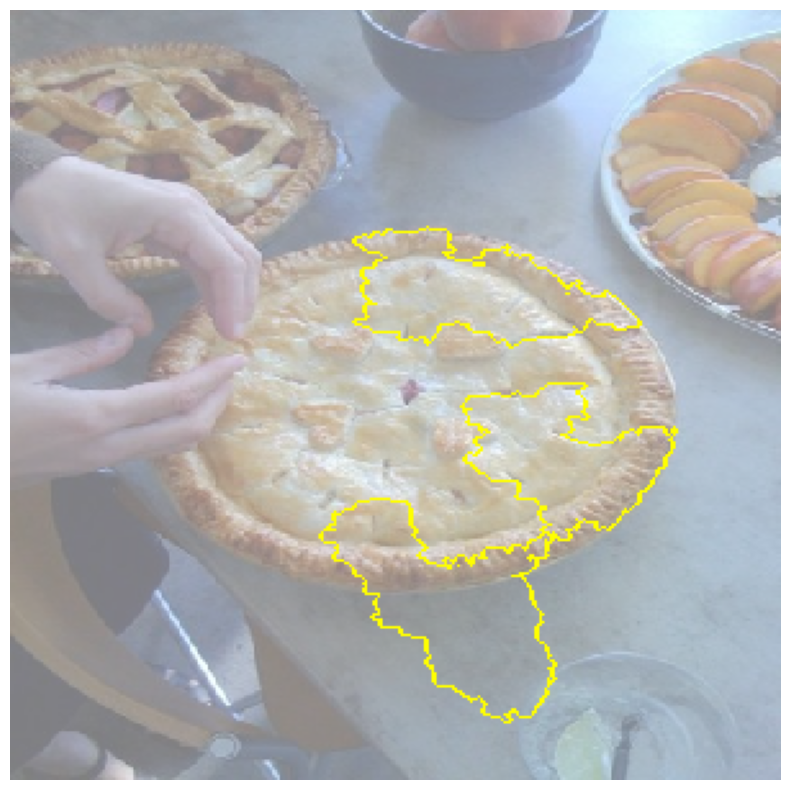

In [41]:
toplabeling = explanation_generation.top_labels[0]
img, mask = explanation_generation.get_image_and_mask(
    toplabeling,                         
    positive_only=True,                
    num_features=5,                   
    hide_rest=False                    
)
plt.imshow(mark_boundaries(img / 2 + 0.5, mask))
plt.axis('off')
plt.show()

In [42]:
class_names=list(validation_generator.class_indices.keys())

In [43]:
print(class_names)

['apple pie', 'baby back ribs', 'baklava', 'beef carpaccio', 'beef tartare', 'beet salad', 'beignets', 'bibimbap', 'bread pudding', 'breakfast burrito', 'bruschetta', 'caesar salad', 'cannoli', 'caprese salad', 'carrot cake', 'ceviche', 'cheese plate', 'cheesecake', 'chicken curry', 'chicken quesadilla', 'chicken wings', 'chocolate cake', 'chocolate mousse', 'churros', 'clam chowder']


In [44]:
category_mapping = {index: category for index, category in enumerate(class_names)}

print(category_mapping)

{0: 'apple pie', 1: 'baby back ribs', 2: 'baklava', 3: 'beef carpaccio', 4: 'beef tartare', 5: 'beet salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread pudding', 9: 'breakfast burrito', 10: 'bruschetta', 11: 'caesar salad', 12: 'cannoli', 13: 'caprese salad', 14: 'carrot cake', 15: 'ceviche', 16: 'cheese plate', 17: 'cheesecake', 18: 'chicken curry', 19: 'chicken quesadilla', 20: 'chicken wings', 21: 'chocolate cake', 22: 'chocolate mousse', 23: 'churros', 24: 'clam chowder'}


In [69]:
from tkinter import *
from tkinter import filedialog
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import pandas as pd  

wind = Tk()
wind.title('Chat Window')
wind.geometry('600x600')
wind.configure(bg='#2ec429')

xi = 0
yi = 0
state = "Hi"
bot_response = ""
height = 0  
weight = 0

def predict_response(image_path):
    image_resize = Image.open(image_path).resize((300, 300))    
    readable_img = img_to_array(image_resize)
    readable_img = np.expand_dims(readable_img, axis=0)
    readable_img = readable_img / 255.0
    
    class_output = model.predict(readable_img)
    class_accommodate = np.argmax(class_output)

    
    category = category_mapping.get(class_accommodate, "Category Unknown")
    return category

def tell_nutrition(category):
    nutrition = df_final_updated.loc[df_final['Food Category'] == category]
    if nutrition.empty:
        return "Nutritional information not found"

    nutrition_info = nutrition.iloc[0].to_dict()
    
    nutrition_str = '\n'.join([f"{key}: {value}" for key, value in nutrition_info.items()])
    
    return nutrition_str

def send_message():
    global yi, state, bot_response, height, weight
    u = user_entry.get()
    
    user = Label(chat_frame, height=1, width=64, bg='#a6a6a6', fg='black', text=u + ' <You ', font=12, anchor='e')
    user.pack(anchor='w', pady=5)  
    
    if state == "Hi" and 'Hi' in u:
        bot = Label(chat_frame, height=1, width=64, bg='white', fg='black', text='Welcome to the Nutriinfo', font=12, anchor='w')
        bot.pack(anchor='w', pady=5)
        
   
        image_path = filedialog.askopenfilename()
        if image_path:
          
            bot_response = predict_response(image_path)
            bot = Label(chat_frame, height=1, width=64, bg='white', fg='black', text=f'Robot> Category predicted: {bot_response}', font=12, anchor='w')
            bot.pack(anchor='w', pady=5)
            state = "Thanks"
    
    elif state == "Thanks" and 'Thanks' in u:
        bot = Label(chat_frame, height=1, width=64, bg='white', fg='black', text='Robot> Tell me more about the nutritional components.', font=12, anchor='w')
        bot.pack(anchor='w', pady=5)
        bot_nutrition = tell_nutrition(bot_response)
        nutrition_text = Text(chat_frame, height=15, width=64, bg='white', fg='black', font=12, wrap=WORD)
        nutrition_text.insert(END, f"Robot> Food Category: {bot_response}\n\n")
        nutrition_text.insert(END, f"{bot_nutrition}")
        nutrition_text.config(state=DISABLED)
        nutrition_text.pack(anchor='w', pady=5)

    user_entry.delete(0, 'end')

    chat_canvas.update_idletasks()
    chat_canvas.yview_moveto(1.0)


hcb_text = Label(height=2, width=14, bg='#0084ff', text='Nutriinfo', font=('Impact', 20), fg='white')
hcb_text.place(x=200, y=5)
chat_canvas = Canvas(wind, height=420, width=580, bg='#f5f5f5')
chat_canvas.place(x=10, y=80)
scrollbar = Scrollbar(wind, orient=VERTICAL, command=chat_canvas.yview)
scrollbar.place(x=590, y=80, height=420)
chat_canvas.configure(yscrollcommand=scrollbar.set)
chat_frame = Frame(chat_canvas, bg='#f5f5f5')

chat_canvas.create_window((0, 0), window=chat_frame, anchor="nw")

chat_frame.bind("<Configure>", lambda event: chat_canvas.configure(scrollregion=chat_canvas.bbox("all")))

entry_bg = Frame(wind, height=60, width=500, bg='white')
entry_bg.place(x=10, y=520)
sendbtn_bg = Frame(height=60, width=65, bg='white')
sendbtn_bg.place(x=525, y=520)

def on_enter(e):
    user_entry.delete(0, 'end')
    user_entry.config(fg='black')

def on_leave(e):
    n = user_entry.get()
    user_entry.config(fg='#5c5a5a')
    if n == '' or n == ' ':
        user_entry.insert(0, 'Enter message...')
        user_entry.config(fg='#5c5a5a')

user_entry = Entry(entry_bg, width=32, bg='white', font=('Helvetica', 20), relief=FLAT, border=0)
user_entry.place(x=10, y=13)
user_entry.insert(0, 'Enter message...')
user_entry.config(fg='#5c5a5a')
user_entry.bind("<FocusIn>", on_enter)
user_entry.bind("<FocusOut>", on_leave)

send_button = Button(sendbtn_bg, height=1, width=3, bg='#0084ff', text='➤', font=('Helvetica', 20),
                     activeforeground='white', fg='white', relief=FLAT, border=0,
                     activebackground='#0084ff', command=send_message)
send_button.place(x=5, y=4)

wind.mainloop()


1/1 [==============================] - 0s 130ms/step
